In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data_process = pd.read_csv("entrada.csv")
alarm_var = pd.read_csv("alarm_list.csv")

In [6]:
def step_signal (low, s_low, high, s_high, larg_high_i, larg_high_f, larg_low_i, larg_low_f, prob_positivo, n):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal


In [10]:
x0 = step_signal(3,0.2,7,0.3,20,100,20,100,0.5,100)
x1 = step_signal(3,0.2,7,0.3,20,100,20,100,0.5,100)


pd.options.display.max_rows = len(x0)

if len(x0) > len(x1):
    if x1[len(x1)-1] >= 2.8 and x1[len(x1)-1] <= 3.2:
        x1 = np.concatenate((x1,np.random.uniform(3-0.2,3+0.2,len(x0)-len(x1))))
    elif x1[len(x1)-1] >= 6.7 and x1[len(x1)-1] <= 7.3:
        x1 = np.concatenate((x1,np.random.uniform(7-0.3,7+0.3,len(x0)-len(x1))))
else:
    delete = np.nonzero(x1[len(x0):])
    x1 = np.delete(x1,delete)
    
tout = np.arange(0,3,3/len(x0),dtype=float)
df = pd.DataFrame({'tout': tout})
df['x0'] = x0
df['x1'] = x1   
df['log'] = 0 
df.head()

,tout,x0,x1,log
0,0.000000,6.740052,3.163104,0
1,0.000548,7.152322,3.133730,0
2,0.001096,7.299935,2.934199,0
3,0.001644,7.108196,2.979566,0
4,0.002192,6.753063,3.087089,0


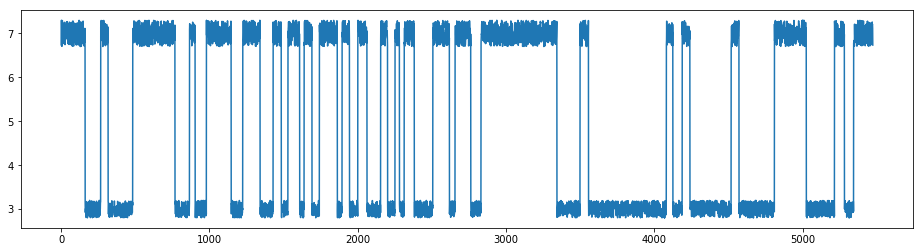

In [11]:
plt.figure(figsize=(16,4))
plt.plot(df['x0'])


In [21]:
limit = 5 
type_ = 'high' 
delay_time = 1000*3/len(x0)
dead_band = 8*3/len(x0)

t_delay = 0
if type_ == 'high':
    df['log'] = df['x0'] > limit

print(tout)

[0.00000000e+00 5.47945205e-04 1.09589041e-03 ... 2.99835616e+00
 2.99890411e+00 2.99945205e+00]


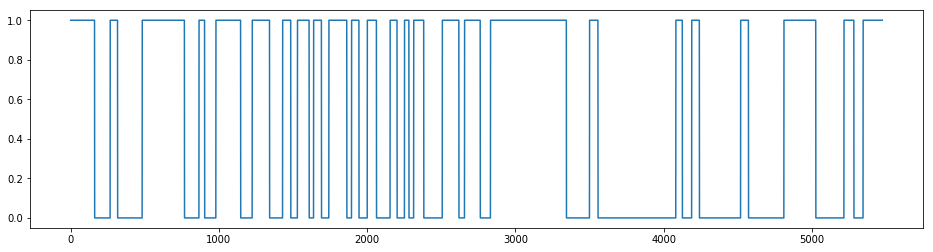

In [22]:
plt.figure(figsize=(16,4))
plt.plot(df['log'])